In [2]:
!pip install geopandas

Defaulting to user installation because normal site-packages is not writeable


In [4]:
# Basic data handling
import pandas as pd
df = pd.DataFrame({'A':[1,2,3], 'B':[4,5,6], 'C':[11,20,19]})
print(df.describe())

         A    B          C
count  3.0  3.0   3.000000
mean   2.0  5.0  16.666667
std    1.0  1.0   4.932883
min    1.0  4.0  11.000000
25%    1.5  4.5  15.000000
50%    2.0  5.0  19.000000
75%    2.5  5.5  19.500000
max    3.0  6.0  20.000000


In [ ]:
for i in range(5):
    print(f"Number: {i}")
    
# Method 1: Print "bilal" 5 times using range()
for i in range(5):
    print("bilal")

# Method 2: Print "bilal" with counter
for i in range(5):
    print(f"bilal {i+1}")


Number: 0
Number: 1
Number: 2
Number: 3
Number: 4
bilal
bilal
bilal
bilal
bilal
bilal 1
bilal 2
bilal 3
bilal 4
bilal 5
Letter: B
Letter: i
Letter: l
Letter: a
Letter: l


In [20]:
files = ["a.tif", "b.tif", "c.tif"]
for f in files:
    print("Processing:", f)


Processing: a.tif
Processing: b.tif
Processing: c.tif


In [24]:
# Conditional inside loop
for num in range(1, 6):
    if num % 2 == 0:
        print(num, "is even")
    else:
        print(num, "is odd")
        

for text in ["World"]:
    if text == "Hello":
        print("Greeting detected:", text)
    else:
        print("Not a greeting:", text)

1 is odd
2 is even
3 is odd
4 is even
5 is odd
Not a greeting: World


In [25]:
squares = [x**2 for x in range(5)]
print(squares)

[0, 1, 4, 9, 16]


In [14]:
# NumPy array ops
import numpy as np
arr = np.array([[1, 2], [3, 4],[10,20]])
print(arr.max())



newarr = np.array([[1,3],[2,6]])
print(newarr.all())

20
True


In [41]:
arr = np.array([[1, 2, 3], [4, 5, 6],[7, 15, 20]])

print("Shape:", arr.shape)
print("Mean:", arr.mean())
print("Sum:", arr.sum())

# Element-wise operations
arr2 = arr * 2
print("Doubled array:\n", arr2)

# Slicing
print("First row:", arr[0])
print("Second row:", arr[1])
print("Third row:", arr[2])

# Filtering
print("Values > 3:", arr[arr > 3])

print("First column:", arr[1, :])



Shape: (3, 3)
Mean: 7.0
Sum: 63
Doubled array:
 [[ 2  4  6]
 [ 8 10 12]
 [14 30 40]]
First row: [1 2 3]
Second row: [4 5 6]
Third row: [ 7 15 20]
Values > 3: [ 4  5  6  7 15 20]
First column: [4 5 6]


{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 1024, 'height': 1024, 'count': 3, 'crs': CRS.from_wkt('LOCAL_CS["WGS 84 / Pseudo-Mercator",UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'), 'transform': Affine(0.29855802128501413, 0.0, -8249945.852108238,
       0.0, -0.2986307024964255, 4967221.773528501)}


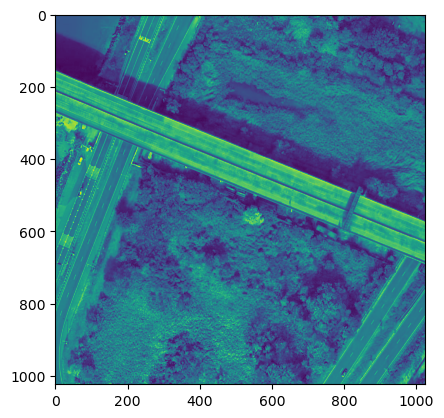

{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 4984, 'height': 3804, 'count': 4, 'crs': CRS.from_wkt('LOCAL_CS["WGS 84 / Pseudo-Mercator",UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'), 'transform': Affine(0.5036302118371189, 0.0, -8052410.131680521,
       0.0, -0.5036302118370707, 2101683.5343313776)}


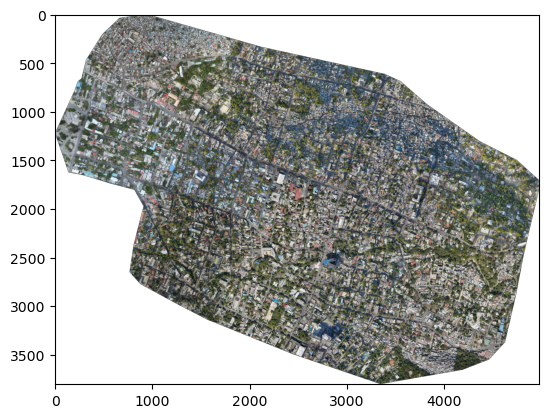

In [43]:
# RasterIO example
import rasterio
from rasterio.plot import show
with rasterio.open("E:\Learning Courses\OpenGeoHub Screening Test\Patch 8.tif") as src:
    print(src.meta)
    band1 = src.read(1)  # Read first band
    show(band1)  # Quick plot
    
    
# RasterIO example
with rasterio.open("E:\Learning Courses\OpenGeoHub Screening Test\Droneimage2.tif") as src:
    print(src.meta)
    band2 = src.read()  # Read first band
    show(band2)  # Quick plot

In [33]:
mean_val = np.mean(band1)
print("Mean pixel value:", mean_val)


Mean pixel value: 94.01898288726807


In [44]:
# Save modified raster
with rasterio.open(
    "output.tif",
    'w',
    driver='GTiff',
    height=band1.shape[0],
    width=band1.shape[1],
    count=1,
    dtype=band1.dtype,
    crs=src.crs,
    transform=src.transform
) as dst:
    dst.write(band1 * 2, 1)  # Write doubled values

In [45]:
from osgeo import gdal

# Open raster
dataset = gdal.Open("E:\Learning Courses\OpenGeoHub Screening Test\Patch 8.tif")
print("Raster size:", dataset.RasterXSize, dataset.RasterYSize)
print("Projection:", dataset.GetProjection())

# Read as NumPy array
band = dataset.GetRasterBand(1)
array = band.ReadAsArray()
print("Min:", array.min(), "Max:", array.max())

Raster size: 1024 1024
Projection: LOCAL_CS["WGS 84 / Pseudo-Mercator",UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


ImportError: DLL load failed while importing _gdal_array: The specified procedure could not be found.

In [ ]:
# Parallel processing
from multiprocessing import Pool
def square(x): return x*x
with Pool(4) as p:
    print(p.map(square, [1, 2, 3, 4]))

In [4]:

import geopandas as gpd
from shapely.geometry import Point
import rasterio
import numpy as np
import xarray as xr
import rioxarray

# --- geopandas: Working with Vector Data ---
# GeoPandas is built on Pandas and extends it to handle geospatial data.
# It is used for points, lines, and polygons (vector data).
print("--- GeoPandas: Creating and Joining Vector Data ---")

ModuleNotFoundError: No module named 'geopandas'

In [ ]:
# 1. Create a simple GeoDataFrame of city points
# The 'geometry' column is what makes it a GeoDataFrame.
# The 'crs' (Coordinate Reference System) is essential for correct spatial operations.
data = {'city': ['New York', 'London'], 'country': ['USA', 'UK']}
geometry = [Point(-74.0, 40.7), Point(-0.1, 51.5)]
cities_gdf = gpd.GeoDataFrame(data, geometry=geometry, crs="EPSG:4326")
print("Original Cities GeoDataFrame:")
print(cities_gdf)

In [ ]:
# 2. Create a polygon to represent a "region of interest"
# We'll use a buffer around a point to create a simple circle.
region_poly = gpd.GeoSeries([Point(-75.0, 40.0).buffer(2)], crs="EPSG:4326")
region_gdf = gpd.GeoDataFrame(geometry=region_poly)

In [ ]:
# 3. Perform a spatial join (sjoin) to find which cities are within the region
# 'inner' join keeps only the cities that fall within the polygon.
# 'predicate="within"' specifies the spatial relationship to test.
joined_gdf = gpd.sjoin(cities_gdf, region_gdf, how="inner", predicate="within")
print("\nCities GeoDataFrame after spatial join (only cities within the region):")
print(joined_gdf)
print("-" * 50)

# --- rasterio: Reading and Writing Raster Data ---
# Rasterio is the go-to library for reading and writing raster files like GeoTIFFs.
print("--- Rasterio: Manipulating Raster Files ---")

In [ ]:
# 1. Create a dummy raster file for demonstration purposes
# This part is just to ensure the rest of the code is runnable without a pre-existing file.
# In a real-world scenario, you would open an existing file.
with rasterio.open(
    'example_raster.tif',
    'w',
    driver='GTiff',
    height=10,
    width=10,
    count=1,
    dtype=rasterio.uint8,
    crs='EPSG:4326',
    transform=rasterio.transform.from_origin(-100, 40, 1, 1)
) as dst:
    # Write some simple data (a grid of 1s) to the file.
    dst.write(np.full((10, 10), 1, dtype=rasterio.uint8), 1)
print("Created a dummy raster file: 'example_raster.tif'")

# 2. Open the raster file and inspect its properties
# The 'with' statement ensures the file is properly closed after use.
with rasterio.open('example_raster.tif') as src:
    print(f"\nRaster dimensions: {src.width}x{src.height}")
    print(f"Number of bands: {src.count}")
    print(f"Coordinate Reference System (CRS): {src.crs}")
    print(f"Data type: {src.dtype}")

    # Read the data from the first band into a NumPy array
    band1_data = src.read(1)
    print(f"Data from band 1 (NumPy array):\n{band1_data}")

    # Read the full metadata profile
    profile = src.profile
    print("\nFull Raster Profile:")
    print(profile)
print("-" * 50)

# --- xarray and rioxarray: Handling Data Cubes and Reprojection ---
# Xarray is perfect for multi-dimensional data (like time-series of EO images).
# Rioxarray adds geospatial functionalities (like CRS and reprojection) to xarray objects.
print("--- Xarray & Rioxarray: Working with Data Cubes ---")

# 1. Create a multi-dimensional xarray DataArray
# This simulates a small data cube with time, latitude, and longitude dimensions.
# The 'dims' and 'coords' parameters are essential for creating a labeled array.
time_steps = [np.datetime64('2023-01-01'), np.datetime64('2023-01-08')]
latitudes = np.arange(40, 43)
longitudes = np.arange(-110, -107)

data_cube = xr.DataArray(
    np.random.rand(2, 3, 3),
    coords=[('time', time_steps), ('lat', latitudes), ('lon', longitudes)],
    name='temperature',
    attrs={'units': 'Celcius'}
)
print("Original xarray DataArray (simulated data cube):")
print(data_cube)

# 2. Add geospatial information using rioxarray
# The .rio accessor is the key to rioxarray's functionality.
# write_crs() adds the CRS, making the DataArray a true geospatial object.
data_cube.rio.write_crs("EPSG:4326", inplace=True)
print(f"\nCRS added by rioxarray: {data_cube.rio.crs}")

# 3. Perform a reprojection
# We can easily reproject the entire data cube to a new CRS.
reprojected_data_cube = data_cube.rio.reproject("EPSG:3857")
print(f"\nCRS after reprojection to EPSG:3857 (Web Mercator): {reprojected_data_cube.rio.crs}")

# 4. Save the DataArray to a GeoTIFF
# Rioxarray handles writing the multi-dimensional data to a raster format.
reprojected_data_cube.rio.to_raster("reprojected_data_cube.tif")
print("\nSaved the reprojected data cube to 'reprojected_data_cube.tif'")
